In [384]:
#Load libraries

In [427]:
import pandas as pd
import numpy as np
import squarify 
import matplotlib.pyplot as plt
import statsmodels.api as sm


In [386]:
#Load dataset

In [387]:
df = pd.read_csv('\\Fifa_23_Players_Data.csv')
df.head()

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Image Link,Age,...,LM Rating,CM Rating,RM Rating,LWB Rating,CDM Rating,RWB Rating,LB Rating,CB Rating,RB Rating,GK Rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,...,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,...,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,...,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,...,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,...,92,84,92,70,66,70,66,57,66,21


In [388]:
#CLEANING DATA

In [389]:
#Remove unneccesary columns

In [390]:
df.columns

Index(['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)',
       'Positions Played', 'Best Position', 'Nationality', 'Image Link', 'Age',
       'Height(in cm)', 'Weight(in kg)', 'TotalStats', 'BaseStats',
       'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position',
       'Contract Until', 'Club Jersey Number', 'Joined On', 'On Loan',
       'Preferred Foot', 'Weak Foot Rating', 'Skill Moves',
       'International Reputation', 'National Team Name',
       'National Team Image Link', 'National Team Position',
       'National Team Jersey Number', 'Attacking Work Rate',
       'Defensive Work Rate', 'Pace Total', 'Shooting Total', 'Passing Total',
       'Dribbling Total', 'Defending Total', 'Physicality Total', 'Crossing',
       'Finishing', 'Heading Accuracy', 'Short Passing', 'Volleys',
       'Dribbling', 'Curve', 'Freekick Accuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'Sprint Speed', 'Agility', 'Reactions', 'Balance',
       'Shot Powe

In [391]:
columns = ['Known As', 'Full Name', 'Overall', 'Potential', 'Value(in Euro)','Positions Played', 'Best Position', 'Nationality', 'Age', 'Height(in cm)', 'Weight(in kg)', 'Club Name', 'Wage(in Euro)', 'Release Clause', 'Club Position', 'Contract Until',  'Preferred Foot', 'Weak Foot Rating', 'Skill Moves']
data = df[columns]

In [392]:
#Cleaning empty cells

In [393]:
data.isna().any()

Known As            False
Full Name           False
Overall             False
Potential           False
Value(in Euro)      False
Positions Played    False
Best Position       False
Nationality         False
Age                 False
Height(in cm)       False
Weight(in kg)       False
Club Name           False
Wage(in Euro)       False
Release Clause      False
Club Position       False
Contract Until      False
Preferred Foot      False
Weak Foot Rating    False
Skill Moves         False
dtype: bool

In [394]:
data["Value(in million Euro)"] = data["Value(in Euro)"] / 1000000
data["Wage(in thousand Euro)"] = data["Wage(in Euro)"] / 1000
data["Release Clause in million Euro"] = data["Release Clause"] / 1000000

C:\Users\phbin\AppData\Local\Temp\ipykernel_7308\2767844944.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Value(in million Euro)"] = data["Value(in Euro)"] / 1000000
C:\Users\phbin\AppData\Local\Temp\ipykernel_7308\2767844944.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Wage(in thousand Euro)"] = data["Wage(in Euro)"] / 1000
C:\Users\phbin\AppData\Local\Temp\ipykernel_7308\2767844944.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [395]:
data["Value(in million Euro)"].describe()

count    17529.000000
mean         2.931541
std          7.816143
min          0.000000
25%          0.500000
50%          1.000000
75%          2.000000
max        190.500000
Name: Value(in million Euro), dtype: float64

In [396]:
data["Value(in million Euro)"].fillna(data["Value(in million Euro)"].median(), inplace= True)

C:\Users\phbin\AppData\Local\Temp\ipykernel_7308\897935632.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Value(in million Euro)"].fillna(data["Value(in million Euro)"].median(), inplace= True)


In [397]:
data["Wage(in thousand Euro)"].describe()


count    17529.000000
mean         9.006943
std         19.851989
min          0.000000
25%          1.000000
50%          3.000000
75%          8.000000
max        450.000000
Name: Wage(in thousand Euro), dtype: float64

In [398]:
data["Wage(in thousand Euro)"].fillna(data["Wage(in thousand Euro)"].median(), inplace= True)

C:\Users\phbin\AppData\Local\Temp\ipykernel_7308\291098562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Wage(in thousand Euro)"].fillna(data["Wage(in thousand Euro)"].median(), inplace= True)


In [399]:
data["Release Clause in million Euro"].describe()

count    17529.000000
mean         5.171944
std         15.016280
min          0.000000
25%          0.674000
50%          1.500000
75%          3.400000
max        366.700000
Name: Release Clause in million Euro, dtype: float64

In [400]:
data["Release Clause in million Euro"].fillna(data["Release Clause in million Euro"].median(), inplace= True)



C:\Users\phbin\AppData\Local\Temp\ipykernel_7308\4018272219.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Release Clause in million Euro"].fillna(data["Release Clause in million Euro"].median(), inplace= True)


In [401]:
#Cleaning wrong format

In [402]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17529 entries, 0 to 17528
Data columns (total 22 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Known As                        17529 non-null  object 
 1   Full Name                       17529 non-null  object 
 2   Overall                         17529 non-null  int64  
 3   Potential                       17529 non-null  int64  
 4   Value(in Euro)                  17529 non-null  int64  
 5   Positions Played                17529 non-null  object 
 6   Best Position                   17529 non-null  object 
 7   Nationality                     17529 non-null  object 
 8   Age                             17529 non-null  int64  
 9   Height(in cm)                   17529 non-null  int64  
 10  Weight(in kg)                   17529 non-null  int64  
 11  Club Name                       17529 non-null  object 
 12  Wage(in Euro)                   

In [403]:
print(data["Contract Until"].unique())

['2023' '2025' '2024' '2026' '2027' '2022' '2028' '-' '2031' '2032']


In [404]:
data = data.replace('-', '0')
print(data["Contract Until"].unique())



['2023' '2025' '2024' '2026' '2027' '2022' '2028' '0' '2031' '2032']


In [405]:
data["Contract Until"] = data["Contract Until"].astype(int)
data = data.replace(0, int(data["Contract Until"].mean()))
print(data["Contract Until"].dtype)

int32


In [406]:
#Remove duplicated rows

In [407]:
data[data.duplicated()]

,Known As,Full Name,Overall,Potential,Value(in Euro),Positions Played,Best Position,Nationality,Age,Height(in cm),...,Wage(in Euro),Release Clause,Club Position,Contract Until,Preferred Foot,Weak Foot Rating,Skill Moves,Value(in million Euro),Wage(in thousand Euro),Release Clause in million Euro


In [408]:
#No duplicated rows

In [409]:
#DATA ANALYSIS

In [410]:
data.sort_values("Overall", ascending= False)[["Full Name", "Overall"]].head(10)

,Full Name,Overall
0,Lionel Messi,91
2,Robert Lewandowski,91
3,Kevin De Bruyne,91
4,Kylian Mbappé,91
1,Karim Benzema,91
5,Mohamed Salah,90
6,Thibaut Courtois,90
7,Manuel Neuer,90
8,C. Ronaldo dos Santos Aveiro,90
9,Virgil van Dijk,90


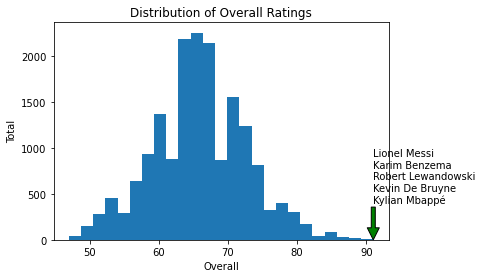

In [411]:
highest_overall = data["Overall"].max()
players_highest_overall = '\n'.join(data[data["Overall"] == highest_overall]["Full Name"].tolist())

plt.hist(data['Overall'], bins=25)
plt.xlabel('Overall')
plt.ylabel('Total')
plt.title('Distribution of Overall Ratings')
plt.annotate(players_highest_overall, xy = (highest_overall, 0), xytext = (highest_overall, 400), arrowprops = dict(facecolor ='green'))
plt.show()

In [412]:
data.sort_values("Potential", ascending = False)[["Full Name", "Potential"]].head(10)

,Full Name,Potential
4,Kylian Mbappé,95
21,Erling Haaland,94
82,Pedro González López,93
83,Phil Foden,92
63,Vinícius José de Oliveira Júnior,92
42,Frenkie de Jong,92
22,Gianluigi Donnarumma,92
0,Lionel Messi,91
16,Ederson Santana de Moraes,91
127,Jamie Tartt,91


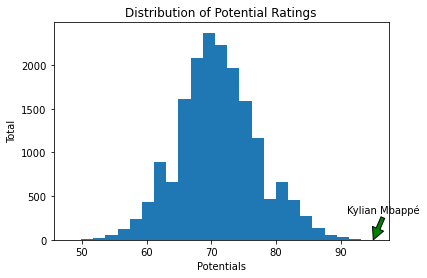

In [413]:
highest_potential = data["Potential"].max()
players_highest_potential = '\n'.join(data[data["Potential"] == highest_potential]["Full Name"].tolist())

plt.hist(data["Potential"], bins = 25)
plt.xlabel("Potentials")
plt.ylabel("Total")
plt.title('Distribution of Potential Ratings')
plt.annotate(players_highest_potential, xy = (highest_potential, 0), xytext = (highest_overall, 300), arrowprops=dict(facecolor = 'green'))

plt.show()

In [414]:
specified_order = ["GK", "RWB", "RB", "CB", "LB", "LWB", "CDM", "CM", "CAM", "RM", "LM", "RW", "LW", "CF", "ST"]
best_by_position = data.groupby("Best Position")[["Overall", "Potential"]].max().sort_index(key=lambda x: x.map({v: i for i, v in enumerate(specified_order)}))

best_overall_by_post = []
best_potential_by_post = []

for ind, row in best_by_position.iterrows():
    best_overall_by_post.append(", ".join(data[(data["Overall"] == row["Overall"]) & (data["Best Position"] == ind)]["Full Name"].tolist()))
    best_potential_by_post.append(", ".join(data[(data["Potential"] == row["Potential"]) & (data["Best Position"] == ind)]["Full Name"].tolist()))

best_by_position["Best Overall Players"] = best_overall_by_post
best_by_position["Best Potential Players"] = best_potential_by_post

best_by_position

,Overall,Potential,Best Overall Players,Best Potential Players
Best Position,,,,
GK,90,92,"Thibaut Courtois, Manuel Neuer",Gianluigi Donnarumma
RWB,84,88,Reece James,Reece James
RB,85,87,Kyle Walker,Achraf Hakimi
CB,90,91,Virgil van Dijk,Rúben Santos Gato Alves Dias
LB,88,88,João Pedro Cavaco Cancelo,"João Pedro Cavaco Cancelo, Nuno Alexandre Tava..."
LWB,85,90,Theo Hernández,Theo Hernández
CDM,89,90,"Carlos Henrique Venancio Casimiro, Joshua Kimm...","Joshua Kimmich, Sandro Tonali"
CM,91,93,Kevin De Bruyne,Pedro González López
CAM,91,92,Lionel Messi,Phil Foden


In [415]:
data.groupby("Club Name")[["Overall", "Potential"]].mean().round(2).sort_values(["Overall", "Potential"], ascending= [False, False]).head(10)



,Overall,Potential
Club Name,,
FC Bayern München,80.59,84.73
Paris Saint-Germain,79.81,84.23
Inter,79.73,82.65
Manchester City,79.31,84.42
Liverpool,78.67,83.60
Chelsea,78.34,84.14
AFC Richmond,78.11,80.05
Villarreal CF,78.08,81.08
RB Leipzig,77.71,81.92


In [416]:
data["delta_potential_overall"] = data["Potential"] - data["Overall"]
data[data["Potential"] >= 85][["Full Name", "Best Position", "Nationality", "Club Name", "Age", "Overall", "Potential","delta_potential_overall"]].sort_values(["delta_potential_overall", 'Potential'], ascending= [False, False]).head(10)

,Full Name,Best Position,Nationality,Club Name,Age,Overall,Potential,delta_potential_overall
11114,Carney Chukwuemeka,CAM,England,Chelsea,18,64,86,22
10334,Alejandro Garnacho Ferreyra,LW,Argentina,Manchester United,18,64,85,21
10488,Mika Godts,CAM,Belgium,KRC Genk,17,64,85,21
11010,Charlie Patino,CM,England,Blackpool,18,64,85,21
6645,Antonio Nusa,LW,Norway,Club Brugge KV,17,68,88,20
6997,Jamie Bynoe-Gittens,RM,England,Borussia Dortmund,17,67,87,20
8306,António João Tavares Silva,CB,Portugal,SL Benfica,18,66,86,20
8381,Kayky da Silva Chagas,LM,Brazil,FC Paços de Ferreira,19,66,86,20
9331,Marko Lazetić,ST,Serbia,AC Milan,18,65,85,20
9354,Dane Scarlett,ST,England,Portsmouth,18,65,85,20


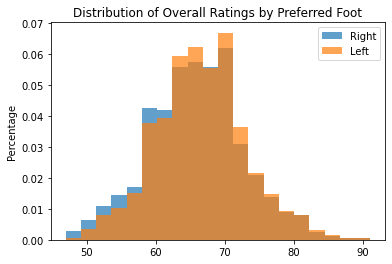

In [417]:
plt.hist(data[data["Preferred Foot"] == "Right"]["Overall"], bins = 20, density= True, alpha = 0.7)
plt.hist(data[data["Preferred Foot"] == "Left"]["Overall"], bins = 20, density= True, alpha = 0.7)

plt.ylabel("Percentage")
plt.legend(["Right", "Left"])
plt.title("Distribution of Overall Ratings by Preferred Foot")

plt.show()

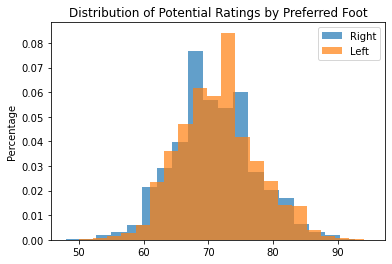

In [418]:
plt.hist(data[data["Preferred Foot"] == "Right"]["Potential"], bins = 20, density= True, alpha = 0.7)
plt.hist(data[data["Preferred Foot"] == "Left"]["Potential"], bins = 20, density= True, alpha = 0.7)

plt.ylabel("Percentage")
plt.title("Distribution of Potential Ratings by Preferred Foot")
plt.legend(["Right", "Left"])

plt.show()

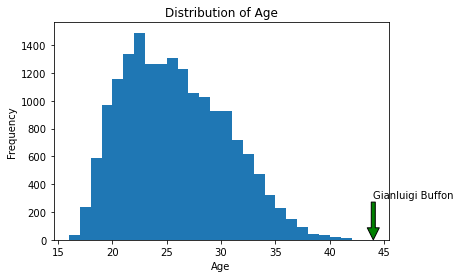

In [419]:
oldest = data["Age"].max()
youngest = data["Age"].min()
players_oldest = '\n'.join(data[data["Age"] == oldest]["Full Name"].tolist())

plt.hist(data["Age"], bins = oldest - youngest)
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Distribution of Age")
plt.annotate(players_oldest, xy = (oldest, 0), xytext = (oldest, 300), arrowprops=dict(facecolor = 'green'))

plt.show()


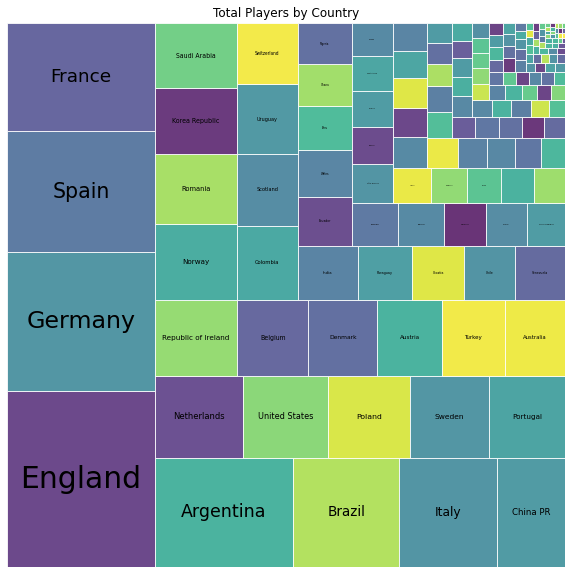

In [420]:
nationality_counts = data['Nationality'].value_counts()

top_countries = 50  
top_nationalities = nationality_counts.head(top_countries)

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111)

sizes = nationality_counts.values
labels = ['' if nationality not in top_nationalities.index else nationality for nationality in nationality_counts.index]

treemap = squarify.plot(sizes=sizes, label=labels, ax=ax, alpha=0.8, edgecolor='white')

ax.set_title('Total Players by Country')

for text in treemap.texts:
    for i, nationality in enumerate(labels):
        if text.get_text() == nationality:
            text.set_fontsize(sizes[i] * 0.02)  

plt.axis('off')

plt.show()


In [421]:
correlation = data["Overall"].corr(data["Wage(in Euro)"])
print("Correlation between Overall and Wage: ", correlation)

Correlation between Overall and Wage:  0.6016491356433196


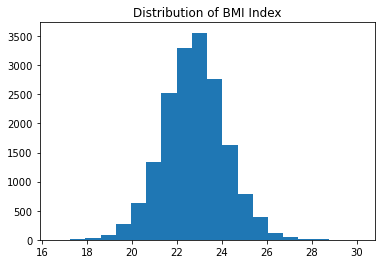

In [422]:
data["bmi"] = data["Weight(in kg)"] / (data['Height(in cm)']/100)**2

plt.hist(data["bmi"], bins = 20)
plt.title("Distribution of BMI Index")

plt.show()

In [423]:
data["right_preferred_foot"] = (data["Preferred Foot"] == "Right").astype(int)
data[["Overall", "Potential", "Value(in million Euro)", "Wage(in thousand Euro)", "Age", "Height(in cm)", "Weight(in kg)", "Skill Moves", "right_preferred_foot"]].corr()

,Overall,Potential,Value(in million Euro),Wage(in thousand Euro),Age,Height(in cm),Weight(in kg),Skill Moves,right_preferred_foot
Overall,1.000000,0.662410,0.068684,0.116174,0.446341,0.030687,0.131519,0.361619,-0.043788
Potential,0.662410,1.000000,0.038182,0.078242,-0.257565,0.016997,-0.002569,0.271960,-0.040739
Value(in million Euro),0.068684,0.038182,1.000000,0.932269,0.061765,0.007118,0.008372,0.010051,0.009469
Wage(in thousand Euro),0.116174,0.078242,0.932269,1.000000,0.053297,0.008280,0.006538,0.025417,0.005293
Age,0.446341,-0.257565,0.061765,0.053297,1.000000,0.065159,0.217014,0.066645,0.012158
Height(in cm),0.030687,0.016997,0.007118,0.008280,0.065159,1.000000,0.756792,-0.433851,0.075197
Weight(in kg),0.131519,-0.002569,0.008372,0.006538,0.217014,0.756792,1.000000,-0.355282,0.080365
Skill Moves,0.361619,0.271960,0.010051,0.025417,0.066645,-0.433851,-0.355282,1.000000,-0.084897
right_preferred_foot,-0.043788,-0.040739,0.009469,0.005293,0.012158,0.075197,0.080365,-0.084897,1.000000
